In [ ]:
from google.colab import files
dtst=files.upload()

Saving spam.xlsx to spam.xlsx


In [ ]:
import pandas as pd
new_dtst=pd.read_excel(dtst['spam.xlsx'])
new_dtst

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
daf=new_dtst.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1)
daf

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
daf.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
daf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
daf.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          v1     v2
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
5567  False  False
5568  False  False
5569  False  False
5570  False  False
5571  False  False

[5572 rows x 2 columns]>

In [ ]:
x=daf.iloc[:,1]
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
daf['result']=daf['v1'].apply(lambda x:1 if x=='spam' else 0)

In [ ]:
daf

,v1,v2,result
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
import nltk # natural language tool kit
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

In [ ]:
from nltk.stem.porter import PorterStemmer
p=PorterStemmer()
p.stem('dance')

'danc'

In [ ]:
def transform_text(text):
  text=re.sub("[0-9]","",str(text))
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(p.stem(i))
  text=y[:]
  y.clear()
  for i in text:
     if not i.isdigit():
       y.append(i)
  return " ".join(y)

In [ ]:
transform_text('Raja %d Ahirwar how 22 are you loved machine')

'raja ahirwar love machin'

In [ ]:
daf['transformed_text']=daf['v2'].apply(transform_text)

In [ ]:
daf['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u pound prize claim easi c...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5572, dtype: object

In [ ]:
from wordcloud import WordCloud
wcld=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wcld.generate(daf[daf['result']==1]['transformed_text'].str.cat(sep=" "))

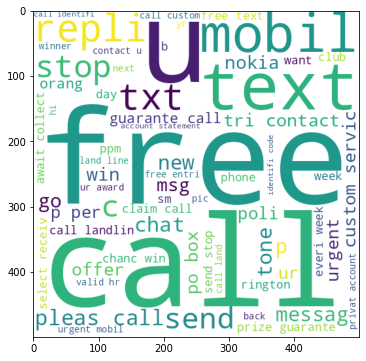

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wcld.generate(daf[daf['result']==0]['transformed_text'].str.cat(sep=" "))

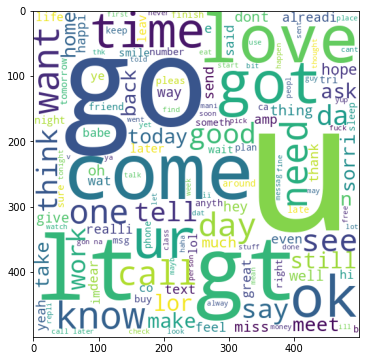

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

top-30 most frequent words

In [ ]:
spam_lst=[]
for msg in daf[daf['result']==0]['transformed_text'].tolist():
  for word in msg.split(" "):
    spam_lst.append(word)

In [ ]:
len(spam_lst)

37481

In [ ]:
from collections import Counter
pdf=pd.DataFrame(Counter(spam_lst).most_common(30))
pdf

,0,1
0,u,985
1,go,419
2,get,361
3,gt,318
4,lt,316
5,come,295
6,call,291
7,know,248
8,ok,245
9,like,244


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvtr=CountVectorizer()

In [ ]:
x=cvtr.fit_transform(daf['transformed_text']).toarray()

In [ ]:
x.shape

(5572, 6017)

In [ ]:
y=daf['result'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8681614349775785
[[840 117]
 [ 30 128]]
0.5224489795918368


In [ ]:
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
mnb.fit(X_train,y_train)
y_pred2=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8681614349775785
[[840 117]
 [ 30 128]]
0.5224489795918368


In [ ]:
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
bnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8681614349775785
[[840 117]
 [ 30 128]]
0.5224489795918368


In [ ]:
y_pred3

array([0, 0, 0, ..., 1, 0, 0])